In [53]:
import pandas as pd
import sqlite3
import cianparser
import os
import numpy as np
import matplotlib.pyplot as plt

class Flat_from_cian:
#     свойства
    def __init__(self,city: str, fpath: str, cnt_row: int):
        self.city=city
        self.fpath=fpath
        self.cnt_row=cnt_row
        
# метод - создание датафрейма        
    def CreateDataframe(self):
        cian_parser = cianparser.CianParser (location=self.city)
        data = cian_parser.get_flats(deal_type="sale", rooms=("all"), with_saving_csv=False, additional_settings={"start_page":1, "end_page":self.cnt_row})
        df = pd.DataFrame(data)
        df['price_square_meter']=round(df['price']/df['total_meters'])
        return df;
        
#  метод - экспорт датафрейма в csv файл       
    def DfToCsvFile(self, fname: str, df):
#         df=self.df
        df.to_csv(self.fpath +fname+'.csv',index= False )
    
#  метод - экспорт датафрейма в pkl файл       
    def DfToPklFile(self, fname: str,df):
        df.to_pickle(self.fpath + fname + '.pkl')

#  метод - экспорт датафрейма в базу данных       
    def DfToDataBase (self, fname: str,df):
        f_name= self.fpath +fname+ '_bd'
        conn = sqlite3.connect(f_name)
        df.to_sql(self.city, conn, if_exists='replace', index = False)

# метод - создание столбчатой диаграммы
    def CreateDiagram (self,df):
#         df['price_square_meter']=round(df['price']/df['total_meters'])
        df_aggr=df.groupby(df["location"]).price_square_meter.agg(["mean", "max"])
        df_aggr.sort_values(['mean']).plot(kind='barh',stacked = True)
        plt.show()
        df_aggr.sort_values(['max']).plot(kind='barh',stacked = True)
        plt.show()

In [55]:
# создаем объект:
a=Flat_from_cian('Москва','C:/Users/123/Documents/ВШ/DS/',5)
# a.CreateDataframe()

# экспорт в разные типы файлов/данных:
a.DfToCsvFile('cian_data',a.CreateDataframe())
a.DfToPklFile('cian_data',a.CreateDataframe())
a.DfToDataBase('cian_data',a.CreateDataframe())


                              Preparing to collect information from pages..
The page from which the collection of information begins: 
 https://cian.ru/cat.php?engine_version=2&p=1&with_neighbors=0&region=1&deal_type=sale&offer_type=flat

 1 | 1 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 28. Progress ratio: 100 %. Average price: 318 631 547 rub

The collection of information from the pages with list of offers is completed
Total number of parsed offers: 28. 

                              Preparing to collect information from pages..
The page from which the collection of information begins: 
 https://cian.ru/cat.php?engine_version=2&p=1&with_neighbors=0&region=1&deal_type=sale&offer_type=flat

 1 | 1 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 28. Progress ratio: 100 %. Average price: 318 631 547 rub

The collection of information from the pages with list of offers is 

In [37]:
a.CreateDataframe()


                              Preparing to collect information from pages..
The page from which the collection of information begins: 
 https://cian.ru/cat.php?engine_version=2&p=1&with_neighbors=0&region=1&deal_type=sale&offer_type=flat

 1 | 1 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 28. Progress ratio: 100 %. Average price: 356 300 428 rub

The collection of information from the pages with list of offers is completed
Total number of parsed offers: 28. 


,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,price,district,street,house_number,underground,residential_complex
0,VESPER,developer,https://www.cian.ru/sale/flat/262519758/,Москва,sale,flat,5,21,2,110.60,-1,0,103787040,Пресненский,Костикова,4к1,Улица 1905 года,Lucky
1,ID 108172779,real_estate_agent,https://www.cian.ru/sale/flat/301496936/,Москва,sale,flat,7,8,1,53.20,-1,0,58786000,Таганский,Славянская площадь,2/5с1,Китай-город,LUMIN
2,SHOW ME,real_estate_agent,https://www.cian.ru/sale/flat/302655849/,Москва,sale,flat,6,6,-1,556.40,-1,0,400000000,Беговой,3-я Ямского Поля,9,Белорусская,Art Residence
3,БЭЛ Девелопмент,developer,https://www.cian.ru/sale/flat/303377181/,Москва,sale,flat,3,6,2,38.70,-1,0,38313000,Тверской,Долгоруковская,25к2,Новослободская,Долгоруковская 25
4,Владимир Фетискин,realtor,https://www.cian.ru/sale/flat/304947229/,Москва,sale,flat,3,8,3,102.00,-1,0,69999000,Хамовники,Комсомольский проспект,5/2,Парк Культуры,
5,Life Style,real_estate_agent,https://www.cian.ru/sale/flat/301907258/,Москва,sale,flat,2,12,1,38.70,-1,0,10500000,Строгино,Исаковского,2К1,Мякинино,
6,Главстрой,developer,https://www.cian.ru/sale/flat/296921092/,Москва,sale,flat,2,18,2,74.60,-1,0,30350099,Филевский парк,Береговой проезд,2,Народное Ополчение,Береговой-2
7,SHOW ME,real_estate_agent,https://www.cian.ru/sale/flat/302081797/,Москва,sale,flat,2,10,2,69.40,-1,0,85000000,Тверской,Палиха,4,Менделеевская,Клубный дом Maison Rouge
8,Владимир Фетискин,realtor,https://www.cian.ru/sale/flat/299278062/,Москва,sale,flat,9,14,2,51.30,-1,0,12999990,Косино-Ухтомский,Дмитриевского,9,Лухмановская,
9,Главстрой,developer,https://www.cian.ru/sale/flat/301772281/,Москва,sale,flat,2,8,2,48.83,-1,0,24219680,Котловка,31/2,31/2,Профсоюзная,Новые Академики ЖК



                              Preparing to collect information from pages..
The page from which the collection of information begins: 
 https://cian.ru/cat.php?engine_version=2&p=1&with_neighbors=0&region=1&deal_type=sale&offer_type=flat

 1 | 1 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 28. Progress ratio: 100 %. Average price: 338 115 156 rub

The collection of information from the pages with list of offers is completed
Total number of parsed offers: 28. 


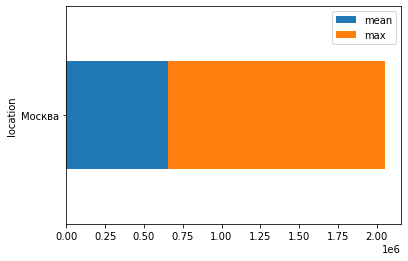

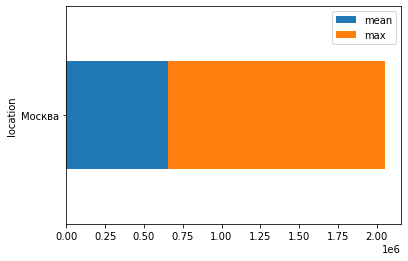

In [49]:
# строим диаграмму
a.CreateDiagram(a.CreateDataframe())

In [51]:
conn.close()